<a href="https://colab.research.google.com/github/ferngonzalezp/deep_learning_lab/blob/main/2022/TP6/TP6_CNN_for_RANS_flow_around_airfoil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TP6 - CNN for RANS flow around airfoil

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras
import random
random.seed(1)
np.random.seed(1)
tf.random.set_seed(1)

In [ ]:
!gdown  1-2Cfvn-VcLPMZW-BJnjLO1xO1mzqx4rX
!gdown  1EEpLlqsDrdERVm6hkap33HFH-pV_nAXZ

In [ ]:
ds_train = np.load('./airfoil_train.npy').transpose(0,2,3,1)
ds_test = np.load('./airfoil_test.npy').transpose(0,2,3,1)
x_train, y_train = ds_train[...,:3], ds_train[...,3:]
x_test, y_test = ds_test[...,:3], ds_test[...,3:]
del ds_train, ds_test

In [ ]:
def show_fields(x,y):
  idx = np.random.randint(x.shape[0])
  plt.figure(figsize=(10,7))
  titles = ['Vx-in', 'Vy-in', 'mask', 'P', 'Vx', 'Vy']
  for i in range(3):
    plt.subplot(2,3,i+1)
    plt.title(titles[i])
    plt.imshow(x[idx,:,:,i], origin='upper', cmap='magma')
  for i in range(3,6):
    plt.subplot(2,3,i+1)
    plt.title(titles[i])
    plt.imshow(y[idx,:,:,i-3], origin='upper', cmap='magma')

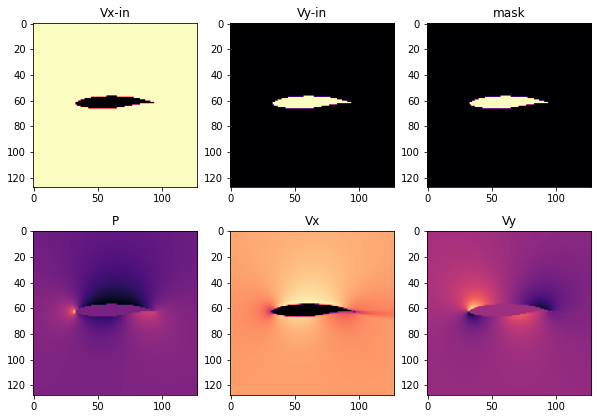

In [ ]:
show_fields(x_train, y_train)

Using the airfoil dataset, we are going to train a Neural Network to aprroximate the solution of the RANS simulation. You will have to perform all the required steps to train and evaluate the model.

**1. Data Pre-processing**

The first step is to preprocess the data. The follwing normalizations are needed:



*   The target variables are normalized with respect to the magnitude free-stream velocity being: 
\begin{equation}
  \tilde{V_o} = V_o/|V_i|
\end{equation}
\begin{equation}
  \tilde{P} = P/|V_i|^2
\end{equation}

  Where $|V_i| = \sqrt{V_{ix}^2 + V_{iy}^2}$.
*   Substract the mean of each pressure sample:
\begin{equation}
  \hat{P} = \tilde{P} - \tilde{P}_{mean}
\end{equation}

  Where $\tilde{P}_{mean} = \frac{1}{N}\sum_k^N{\tilde{p}}$
*   The last part is to normalize each variable in the [-1,1] range, we use the maximun value of each variable of the entire dataset to do the normalization.

*   In this problem we have an input tensor $X$ and an output tensor $Y$, the input tensor is $X = [V_{ix}, V_{iy}, mask]$ and the output tensor is $Y = [P, V_{ox}, V_{oy}]$.

In [ ]:
# Your code Here

**2. Network Setup**

The neural network model should be a CNN which accepts as input the boundary conditions and output the target variables. The recommended network used in the [paper](https://arxiv.org/abs/1810.08217) is a U-Net.

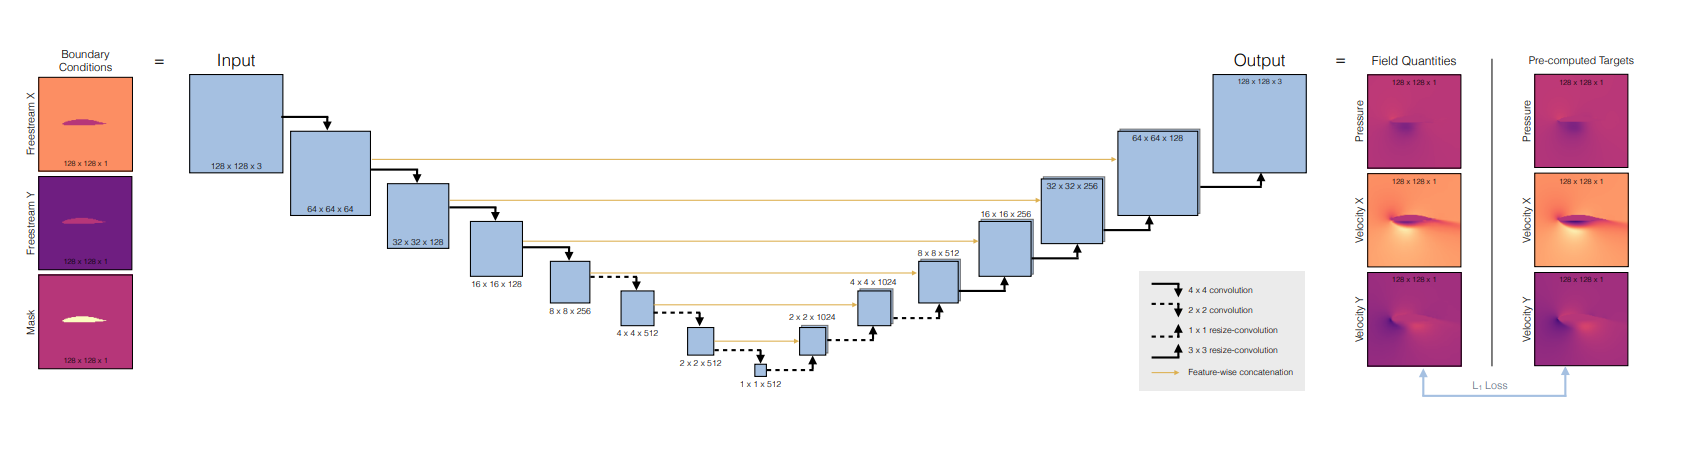

Is not mandatory to build the same model you can build a simpler network, although this is more likely to work. You can see this [tutorial](https://keras.io/examples/vision/oxford_pets_image_segmentation/) in order to learn how to build a U-Net in Keras.

In [ ]:
#your code here

**3. Model Training**

For training use the Adam optimizer, the Mean Absolute error as training loss and the Mean Absolute Percentage Error as metric. Train at least for 50 epochs. To keep track of the model is recommended to make a checkpoint, to do this you can create a callback:

`callbacks = [
    keras.callbacks.ModelCheckpoint("save_at_{epoch}.h5"),
]`

and include it in the training loop:

`model.fit(
    x, y, epochs=epochs, callbacks=callbacks,  validation_split=0.1
)`

In [ ]:
#your code here

Once your model is trained, you need to save it:

In [ ]:
model.save('your_model.h5')

**5. Evaluation**

The last step is to evaluate the model. You'll need to evaluate the model on test data and plot some predictions. Like this:

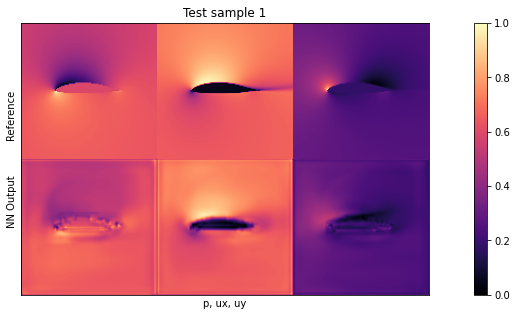

In [ ]:
#Your Code Here